## Web scraping and analysis


### Scraping data from Skytrax


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import nltk
nltk.download()
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I will never travel with Br...
1,✅ Trip Verified | I am already in Portugal so...
2,✅ Trip Verified | Terrible. Avoid this airlin...
3,✅ Trip Verified | Despite being a gold member...
4,Not Verified | Regarding the aircraft and seat...


In [7]:
df.to_csv("BA_reviews.csv")

In [2]:
df = pd.read_csv('BA_reviews.csv')

In [9]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I will never travel with Br...
1,1,✅ Trip Verified | I am already in Portugal so...
2,2,✅ Trip Verified | Terrible. Avoid this airlin...
3,3,✅ Trip Verified | Despite being a gold member...
4,4,Not Verified | Regarding the aircraft and seat...


### Sentiment Analysis

In [3]:
#removing '✅ Trip Verified |', 'Not Verified |'

df["reviews"] = df["reviews"].str.replace("✅ Trip Verified ", "")
df["reviews"] = df["reviews"].str.replace("Not Verified ", "")
df["reviews"] = df["reviews"].str.replace("|", "")
df['reviews']= df['reviews'].str.lower()

C:\Users\kater\AppData\Local\Temp\ipykernel_6176\744701797.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["reviews"] = df["reviews"].str.replace("|", "")


In [4]:
#remove punctuation
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')

C:\Users\kater\AppData\Local\Temp\ipykernel_6176\85666962.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]','')


In [5]:
# tokenize
print(df.iloc[1,1])
df['reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df.iloc[0,1])

  i am already in portugal so contacted them today and they cancelled my return flight because i was 10 minutes late calling them even though i tried for 2 hours to get through the day before now i am unable to get back and they have kept the 500 pounds customer service is shocking they have no intention of helping you
['i', 'will', 'never', 'travel', 'with', 'british', 'airways', 'again', 'i', 'spent', 'over', '10000', 'on', 'a', 'business', 'class', 'seat', 'to', 'attend', 'a', 'funeral', 'in', 'the', 'uk', 'first', 'the', 'boeing', '7879', 'cabin', 'has', '7', 'seats', 'across', 'the', 'aisle', 'so', 'what', 'you', 'are', 'getting', 'in', 'reality', 'is', 'premium', 'economy', 'the', 'seats', 'are', 'narrow', 'and', 'effectively', 'are', 'a', 'business', 'class', 'seat', 'cut', 'in', 'half', 'they', 'have', 'squeezed', 'these', 'seats', 'in', 'which', 'means', 'that', 'some', 'passengers', 'bump', 'their', 'heads', 'into', 'the', 'bulkhead', 'when', 'they', 'stand', 'up', 'and', 'ma

In [6]:
#Removing stopwords
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

    Unnamed: 0                                            reviews
0            0  never travel british airways spent 10000 busin...
1            1  already portugal contacted today cancelled ret...
2            2  terrible avoid airline becoming regular practi...
3            3  despite gold member british airways staff heat...
4            4  regarding aircraft seat business class seats f...
5            5  travelled british airways sweden los angeles v...
6            6  food lousy ever planning asian hindu vegetaria...
7            7  worst experience flight london toronto got del...
8            8  ground staff helpful felt like wanted rush us ...
9            9  second time ba premium economy newer aircraft ...
10          10  changed flights brussels london heathrow lax 4...
11          11  copenhagen chaotic ticket counter assignment h...
12          12  worst experience life trying deal customer ser...
13          13  due code sharing cathay pacific downgraded ba ...
14        

In [7]:
#Calculate polarity to gather sentiment tags.
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
    
df['polarity'] = df['reviews'].apply(polarity_calc)


df['tag'] = df['polarity'].apply(tag_cal)


print(df)

     Unnamed: 0                                            reviews  polarity  \
0             0  never travel british airways spent 10000 busin... -0.073333   
1             1  already portugal contacted today cancelled ret... -0.450000   
2             2  terrible avoid airline becoming regular practi...  0.005556   
3             3  despite gold member british airways staff heat...  0.061111   
4             4  regarding aircraft seat business class seats f... -0.016892   
..          ...                                                ...       ...   
995         995  four flights total airline first flight dublin...  0.001852   
996         996  johannesburg heathrow british airways us proud... -0.052273   
997         997  queue bag drop massive move good 20 mins senio...  0.043182   
998         998  british airways changed plane consequently sea... -0.093750   
999         999  mumbai edinburgh via london im quite surprised...  0.237833   

          tag  
0    Negative  
1    Ne

In [8]:
#The percentage of various types of tags
(df.groupby('tag').size()/df['tag'].count())*100


tag
Negative    31.7
Neutral      1.3
Positive    67.0
dtype: float64

### Visualizing the results


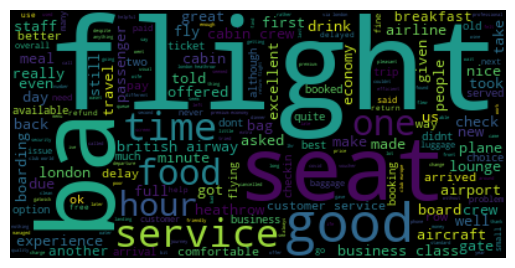

In [9]:
text = " "
for ind in df.index:
    if df['tag'][ind] == "Positive":
        text = text + df['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

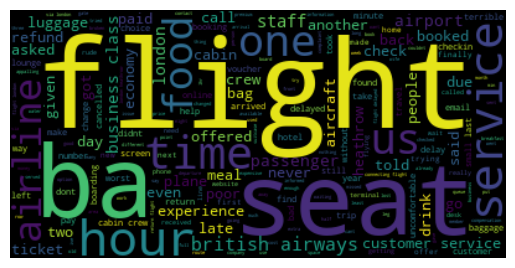

In [10]:
text2= " "        
for ind in df.index:
    if df['tag'][ind] == "Negative":
        text2 = text2 + df['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

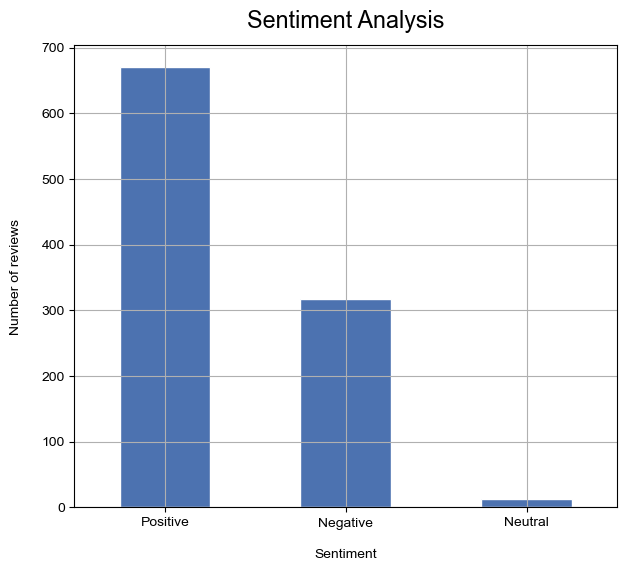

In [11]:
df['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Number of reviews", labelpad=14)
plt.title("Sentiment Analysis", y=1.02);

### Out of 1000 reviews, 67%  of reviews carry sentiment, 31,7 - negative, and 1,3 - neutral